# Extreme Gradient Boosting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing Libraries

In [ ]:
#Importing required libraries
import pandas as pd 
import numpy as np

### Loading the dataset

In [ ]:
#reading the data
data=pd.read_csv('/content/drive/MyDrive/Datasets/EDA/data_cleaned.csv')

In [ ]:
#first five rows of the data
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


### Separating independent and dependent variables

In [ ]:
#independent variables
x = data.drop(['Survived'], axis=1)

#dependent variable
y = data['Survived']

### Creating the train and test dataset

In [ ]:
#import the train-test split
from sklearn.model_selection import train_test_split

In [ ]:
#divide into train and test sets
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 101, stratify=y)

In [ ]:
import lightgbm as lgb
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(train_x,train_y)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.09, max_depth=-5,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
print('Training accuracy {:.4f}'.format(model.score(train_x,train_y)))
print('Testing accuracy {:.4f}'.format(model.score(test_x,test_y)))

Training accuracy 0.9416
Testing accuracy 0.8027


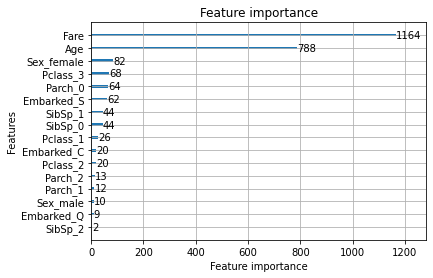

In [ ]:
lgb.plot_importance(model)

## Install XGBoost

Use the following command in terminal or command prompt

_**$ pip install xgboost**_

## Building an XGBM Model

In [ ]:
#Importing XGBM Classifier 
from xgboost import XGBClassifier

In [ ]:
#creating an extreme Gradient boosting instance
clf = XGBClassifier(random_state=96)

In [ ]:
#training the model
clf.fit(train_x,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=96,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#calculating score on training data
clf.score(train_x, train_y)

0.8787425149700598

In [ ]:
#calculating score on test data
clf.score(test_x, test_y)

0.8251121076233184

# Hyperparamter Tuning

Same as GBDT

1. **n_estimators:** Total number of trees
2. **learning_rate:**This determines the impact of each tree on the final outcome
3. **random_state:** The random number seed so that same random numbers are generated every time
4. **max_depth:** Maximum depth to which tree can grow (stopping criteria)
5. **subsample:** The fraction of observations to be selected for each tree. Selection is done by random sampling
6. **objective:** Defines Loss function (*binary:logistic* is for classification using probability, *reg:logistic* is for classification, *reg:linear* is for regression)
7. **colsample_bylevel:** Random feature selection at levels
8. **colsample_bytree:** Random feature selection at tree

In [ ]:
#set parameters
clf = XGBClassifier(random_state=96, colsample_bytree=0.7, max_depth=6)

In [ ]:
#training the model
clf.fit(train_x,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=96,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#calculating score on test data
clf.score(test_x, test_y)

0.8026905829596412

Regularization

1. **gamma:** Minimum reduction in loss at every split
2. **reg_alpha:** Makes leaf weights 0
3. **reg_lambda:** Decrease leaf weights more smoothly

In [ ]:
clf = XGBClassifier(gamma=0.1, random_state=96)

In [ ]:
#training the model
clf.fit(train_x,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=96,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#calculating score on test data
clf.score(test_x, test_y)

0.8251121076233184